Link to video explaining the code - https://www.youtube.com/watch?v=XZhPO043lqU



*   https://www.kaggle.com/drscarlat/predict-the-weather-with-fb-prophet
*   additional regressors (at the end, using forecasts of variables to forecast the target to 2030) https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html 
* uncertainty intervals assume that the future will see the same frequency and magnitude of rate changes as the past. This assumption is probably not true, so you should not expect to get accurate coverage on these uncertainty intervals.


In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
from datetime import datetime
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import holidays
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('/content/clean_quarterly_df_human.csv').dropna()

In [ ]:
df['time']=pd.to_datetime(df['time'],dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        22 non-null     datetime64[ns]
 1   MIN_TEMPERATURE_C           22 non-null     float64       
 2   max_clients_quarter         22 non-null     float64       
 3   total_Holiday_Food_Related  22 non-null     float64       
 4   total_consommation          22 non-null     float64       
 5   pdl_max_total_daily_load    22 non-null     float64       
 6   pdl_max_daily_load          22 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 KB


In [ ]:
df.head()

,time,MIN_TEMPERATURE_C,max_clients_quarter,total_Holiday_Food_Related,total_consommation,pdl_max_total_daily_load,pdl_max_daily_load
0,2015-03-31,8.0,4060.0,2.0,757059.40,22257.0,1551.0
1,2015-06-30,14.0,4137.0,13.0,690218.16,16752.0,1253.0
2,2015-09-30,23.0,4194.0,23.0,669288.36,9186.0,1051.0
3,2015-12-31,13.0,4242.0,3.0,702182.67,18801.0,1327.0
4,2016-03-31,11.0,4346.0,1.0,735924.27,20212.0,1391.0


In [ ]:
ny_df_daily=df.set_index('time')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e36dd7590>,
      dtype=object)

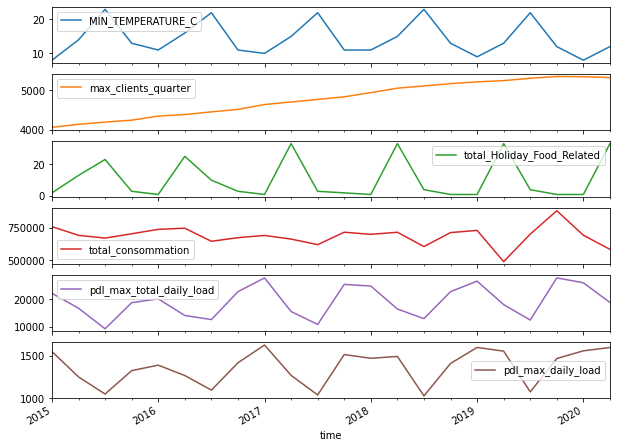

In [ ]:
ny_df_daily.plot(subplots=True)

In [ ]:
from fbprophet import Prophet

In [ ]:
ny_df_daily

,MIN_TEMPERATURE_C,max_clients_quarter,total_Holiday_Food_Related,total_consommation,pdl_max_total_daily_load,pdl_max_daily_load
time,,,,,,
2015-03-31,8.0,4060.0,2.0,757059.40,22257.0,1551.0
2015-06-30,14.0,4137.0,13.0,690218.16,16752.0,1253.0
2015-09-30,23.0,4194.0,23.0,669288.36,9186.0,1051.0
2015-12-31,13.0,4242.0,3.0,702182.67,18801.0,1327.0
2016-03-31,11.0,4346.0,1.0,735924.27,20212.0,1391.0
2016-06-30,16.0,4385.0,25.0,744902.25,14084.0,1269.0
2016-09-30,22.0,4453.0,10.0,644673.06,12568.0,1097.0
2016-12-31,11.0,4516.0,3.0,672429.05,22860.0,1419.0
2017-03-31,10.0,4640.0,1.0,689678.54,27928.0,1628.0


In [ ]:
ny_df_daily.columns

Index(['MIN_TEMPERATURE_C', 'max_clients_quarter',
       'total_Holiday_Food_Related', 'total_consommation',
       'pdl_max_total_daily_load', 'pdl_max_daily_load'],
      dtype='object')

In [ ]:
ny_df_final=ny_df_daily.reset_index()[['time','MIN_TEMPERATURE_C', 'max_clients_quarter', 
        'total_consommation', 'pdl_max_total_daily_load', 'pdl_max_daily_load']].rename({'time':'ds',
        'MIN_TEMPERATURE_C':'MIN_TEMPERATURE_C', 'max_clients_quarter':'max_clients_quarter',
        'total_consommation':'total_consommation','pdl_max_total_daily_load':'pdl_max_total_daily_load',
        'pdl_max_daily_load':'y'}, axis='columns')

In [ ]:
ny_df_final

,ds,MIN_TEMPERATURE_C,max_clients_quarter,total_consommation,pdl_max_total_daily_load,y
0,2015-03-31,8.0,4060.0,757059.40,22257.0,1551.0
1,2015-06-30,14.0,4137.0,690218.16,16752.0,1253.0
2,2015-09-30,23.0,4194.0,669288.36,9186.0,1051.0
3,2015-12-31,13.0,4242.0,702182.67,18801.0,1327.0
4,2016-03-31,11.0,4346.0,735924.27,20212.0,1391.0
5,2016-06-30,16.0,4385.0,744902.25,14084.0,1269.0
6,2016-09-30,22.0,4453.0,644673.06,12568.0,1097.0
7,2016-12-31,11.0,4516.0,672429.05,22860.0,1419.0
8,2017-03-31,10.0,4640.0,689678.54,27928.0,1628.0
9,2017-06-30,15.0,4705.0,661543.78,15536.0,1271.0


In [ ]:
train=ny_df_final[ny_df_final['ds'] <= '2019-12-31']
test=ny_df_final[(ny_df_final['ds'] > '2019-12-31')]

In [ ]:
train.shape

(20, 6)

In [ ]:
test.shape

(2, 6)

In [ ]:
test

,ds,MIN_TEMPERATURE_C,max_clients_quarter,total_consommation,pdl_max_total_daily_load,y
20,2020-03-31,8.0,5348.0,691127.62,26139.0,1560.0
21,2020-06-30,12.0,5326.0,583116.41,18875.0,1599.0


In [ ]:
holidays=pd.DataFrame({'holiday': 'food_related',
  'ds': pd.to_datetime(df[df.total_Holiday_Food_Related>=1].time)})

In [ ]:
holidays

,holiday,ds
0,food_related,2015-03-31
1,food_related,2015-06-30
2,food_related,2015-09-30
3,food_related,2015-12-31
4,food_related,2016-03-31
5,food_related,2016-06-30
6,food_related,2016-09-30
7,food_related,2016-12-31
8,food_related,2017-03-31
9,food_related,2017-06-30


# cross validation

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1,0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
    #'holidays_prior_scale' : [0.01, 0.1, 1.0, 10.0]
    #'changepoint_range' : [0.8,0.85,0.9,0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, initial = 8,horizon='365 days', parallel="processes")
    #by default,initial_training_
    #data_size=3*horizon_size and cutoff is every half horizon
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])


best_params = all_params[np.argmin(mapes)]
print(best_params)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Making 7 forecasts with cutoffs between 2015-07-01 00:00:00 and 2018-06-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff8fb9f49d0>
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than numb

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}

In [ ]:

m = Prophet(interval_width=0.95,yearly_seasonality=True,
            changepoint_prior_scale=0.1,holidays=holidays,seasonality_prior_scale=0.1)



In [ ]:
ny_df_final.drop(['ds'], axis = 1).corr(method='pearson')

,MIN_TEMPERATURE_C,max_clients_quarter,total_consommation,pdl_max_total_daily_load,y
MIN_TEMPERATURE_C,1.000000,-0.070117,-0.317135,-0.882479,-0.922455
max_clients_quarter,-0.070117,1.000000,-0.136204,0.278824,0.277333
total_consommation,-0.317135,-0.136204,1.000000,0.436604,0.162833
pdl_max_total_daily_load,-0.882479,0.278824,0.436604,1.000000,0.845091
y,-0.922455,0.277333,0.162833,0.845091,1.000000


In [ ]:
#max_pdl_total_daily_load and MIN_TEMPERATURE_C are the most correlated variables with our target y
m.add_regressor('MIN_TEMPERATURE_C',standardize=False)
m.add_regressor('pdl_max_total_daily_load',standardize=False)


In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
m.params

{'beta': array([[-9.60976278e-03, -7.81068391e-03, -2.21322161e-03,
         -3.79396711e-03,  1.29727076e-02, -4.45084728e-03,
         -1.17945254e-03, -4.59689048e-05, -5.24180017e-03,
         -1.00480576e-02, -6.51734683e-03, -4.94378940e-03,
          1.51345902e-02, -2.61680971e-04, -2.31378789e-03,
         -4.40141762e-04, -1.29126726e-04, -1.09079789e-02,
         -1.04584065e-02, -7.19727905e-03,  8.47061824e-01,
         -2.51352704e-02,  5.73905387e-06]]),
 'delta': array([[ 1.24284785e-08,  1.19449961e-08, -1.38180583e-08,
          1.68648853e-08, -2.12986976e-08,  4.36961423e-09,
         -3.44818032e-08, -1.84200251e-08, -9.45346657e-09,
         -9.73201693e-09, -1.43453578e-04, -7.02748696e-06,
         -5.46310022e-04, -2.15764545e-06,  3.80490661e-09]]),
 'k': array([[0.05700481]]),
 'm': array([[0.21177397]]),
 'sigma_obs': array([[0.03313879]]),
 'trend': array([[0.21177397, 0.21476212, 0.21778311, 0.22080411, 0.22379226,
         0.22678042, 0.22980141, 0.232822

In [ ]:
future=pd.DataFrame({'ds' : []})
future.ds=test.ds

In [ ]:
future

,ds
20,2020-03-31
21,2020-06-30


In [ ]:

future['total_consommation'] = test['total_consommation']
future['pdl_max_total_daily_load'] = test['pdl_max_total_daily_load']
future['max_clients_quarter'] = test['max_clients_quarter']
future['MIN_TEMPERATURE_C'] = test['MIN_TEMPERATURE_C']



In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-31,1679.636059,1574.346788,1791.153975
1,2020-06-30,1554.999002,1441.961155,1661.103482


In [ ]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-31,1679.636059,1574.346788,1791.153975
1,2020-06-30,1554.999002,1441.961155,1661.103482


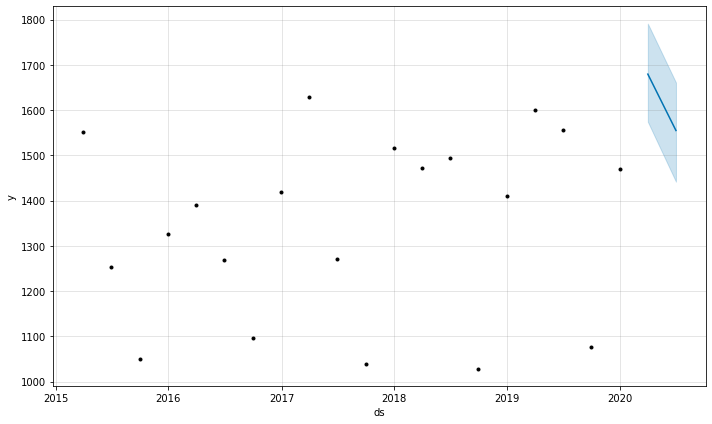

In [ ]:
fig=m.plot(forecast)


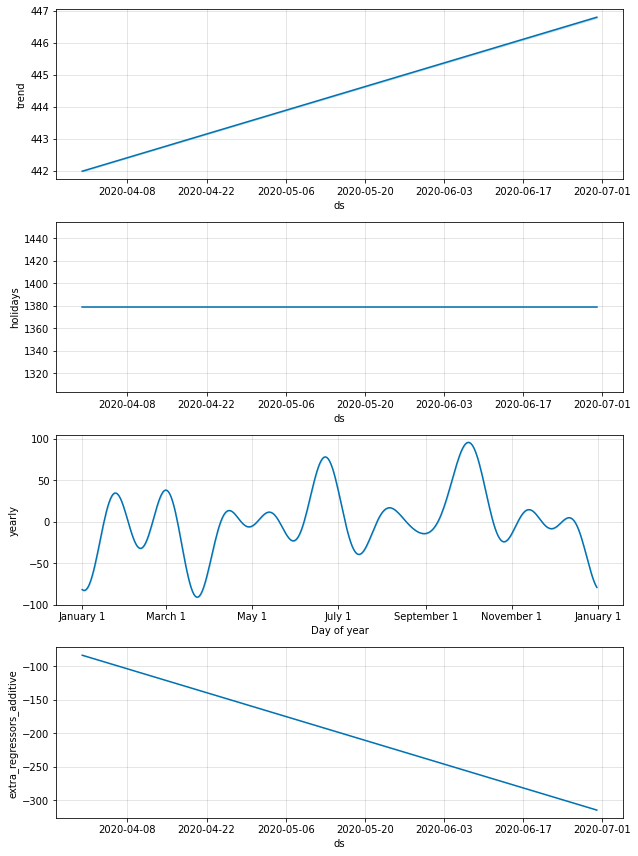

In [ ]:
fig2 = m.plot_components(forecast)

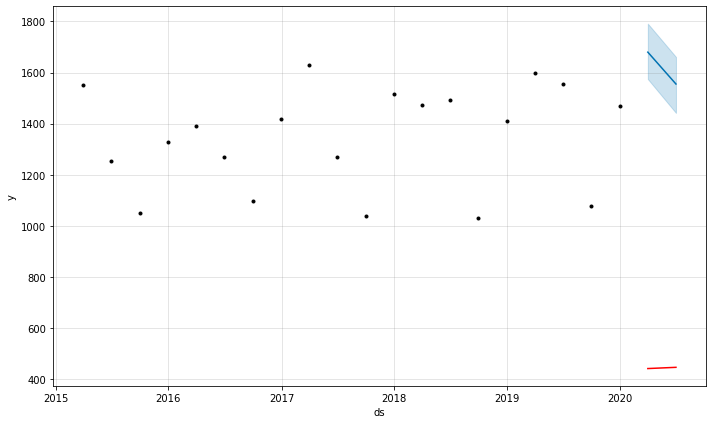

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),m,forecast)
fig

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)} %')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  return

In [ ]:
from sklearn import metrics
import numpy as np

timeseries_evaluation_metrics_func(test['y'], forecast['yhat'])

Evaluation metric results:-
MSE is : 8124.4372474136935
MAE is : 81.81852862652488
RMSE is : 90.13566024284557
MAPE is : 5.210380198053574 %
R2 is : -20.366041413316747

SMAPE is : 2.5593743728978877

MASE is : 2.0979109904237148


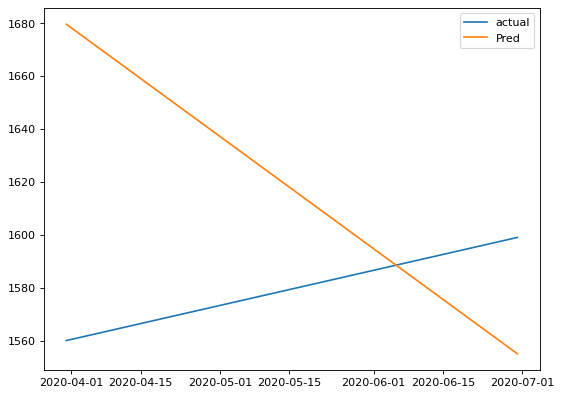

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(forecast['ds'],test['y'],label='actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

# peak period

In [ ]:
from sklearn import metrics
import numpy as np

timeseries_evaluation_metrics_func(test['y'][:1], forecast['yhat'][:1])

Evaluation metric results:-
MSE is : 14312.786667639422
MAE is : 119.63605922814168
RMSE is : 119.63605922814168
MAPE is : 7.668978155650108 %
R2 is : nan

SMAPE is : 7.385771552169073

MASE is : nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

invalid value encountered in double_scalars

